In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/MyDrive/Final Detection 2- 2.v3i.multiclass"


In [ ]:
import os
print(os.listdir(dataset_path))


['README.dataset.txt', 'README.roboflow.txt', 'valid', 'train', 'test']


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CSV file containing labels
csv_path = os.path.join(dataset_path, "/content/drive/MyDrive/Final Detection 2- 2.v3i.multiclass/train/_classes.csv")  # Update if filename is different
df = pd.read_csv(csv_path)
print(df.head())  # View first few rows


                                            filename  Accident  No-Accident
0  acc1-5-_jpg.rf.e15502144eddf7984e43c050cd1da93...         1            0
1  test25_6_jpg.rf.dcabc9253e043fd303c53f0b2ab82c...         0            1
2  test18_6_jpg.rf.e14b45ee4808e74b731faa394629d6...         0            1
3  test7_34_jpg.rf.dcfcf17e4f1c5cb72bbc30e4bfc146...         0            1
4  test16_29_jpg.rf.de84c5da3ffd0485627497ff50891...         1            0


In [ ]:
print("Columns in dataset:", df.columns.tolist())


Columns in dataset: ['filename', 'Accident', 'No-Accident']


In [ ]:
# Image settings
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training Data
train_data = datagen.flow_from_dataframe(
    dataframe=df,
    directory=dataset_path + "/train",
    x_col="filename",  # Uses image filenames
    y_col=["Accident", "No-Accident"],  # Uses accident labels
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="raw",
    subset="training"
)

# Validation Data
val_data = datagen.flow_from_dataframe(
    dataframe=df,
    directory=dataset_path + "/valid",
    x_col="filename",
    y_col=["Accident", "No-Accident"],  # Accident classification labels
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="raw",
    subset="validation"
)


Found 1042 validated image filenames.
Found 0 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1302 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
print(df["filename"].head(10))  # Print first 10 filenames

0    acc1-5-_jpg.rf.e15502144eddf7984e43c050cd1da93...
1    test25_6_jpg.rf.dcabc9253e043fd303c53f0b2ab82c...
2    test18_6_jpg.rf.e14b45ee4808e74b731faa394629d6...
3    test7_34_jpg.rf.dcfcf17e4f1c5cb72bbc30e4bfc146...
4    test16_29_jpg.rf.de84c5da3ffd0485627497ff50891...
5    test10_28_jpg.rf.de47a45711948534b1b13e27f5eaf...
6    test11_6_jpg.rf.e17281983caf1e5f2d3bc872bbd787...
7    test17_14_jpg.rf.dc8e923b4d8c1d93195954d72f758...
8    test_38_jpg.rf.e1ea028f6c45748af2afb19995c5013...
9    test7_51_jpg.rf.e1219518380b488cae22cdf88e86eb...
Name: filename, dtype: object


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset path
dataset_path = "/content/drive/MyDrive/Final Detection 2- 2.v3i.multiclass"

# Load CSV file from the correct path
csv_path = dataset_path + "/train/_classes.csv"  # ✅ Corrected CSV path
df = pd.read_csv(csv_path)

# Print sample filenames to check if paths are correct
print("Sample filenames from CSV:")
print(df["filename"].head(10))

# Check if images exist in the correct directory
image_dir = dataset_path + "/train"  # Adjust if needed
print("Total images in folder:", len(os.listdir(image_dir)))

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create ImageDataGenerator for rescaling and validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training Data
train_data = datagen.flow_from_dataframe(
    dataframe=df,
    directory=dataset_path + "/train",  # ✅ Ensure images are in the right folder
    x_col="filename",
    y_col=["Accident", "No-Accident"],
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="raw",
    subset="training"
)

# Validation Data
val_data = datagen.flow_from_dataframe(
    dataframe=df,
    directory=dataset_path + "/train",  # ✅ Ensure images are in the right folder
    x_col="filename",
    y_col=["Accident", "No-Accident"],
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="raw",
    subset="validation"
)


Sample filenames from CSV:
0    acc1-5-_jpg.rf.e15502144eddf7984e43c050cd1da93...
1    test25_6_jpg.rf.dcabc9253e043fd303c53f0b2ab82c...
2    test18_6_jpg.rf.e14b45ee4808e74b731faa394629d6...
3    test7_34_jpg.rf.dcfcf17e4f1c5cb72bbc30e4bfc146...
4    test16_29_jpg.rf.de84c5da3ffd0485627497ff50891...
5    test10_28_jpg.rf.de47a45711948534b1b13e27f5eaf...
6    test11_6_jpg.rf.e17281983caf1e5f2d3bc872bbd787...
7    test17_14_jpg.rf.dc8e923b4d8c1d93195954d72f758...
8    test_38_jpg.rf.e1ea028f6c45748af2afb19995c5013...
9    test7_51_jpg.rf.e1219518380b488cae22cdf88e86eb...
Name: filename, dtype: object
Total images in folder: 1303
Found 1042 validated image filenames.
Found 260 validated image filenames.


In [ ]:
import os

# Check the first filename from the CSV
first_image = df["filename"].iloc[0]
image_path = os.path.join(dataset_path, "train", first_image)

# Check if the file exists
if os.path.exists(image_path):
    print(f"✅ Image exists: {image_path}")
else:
    print(f"❌ Image NOT found: {image_path}")


✅ Image exists: /content/drive/MyDrive/Final Detection 2- 2.v3i.multiclass/train/acc1-5-_jpg.rf.e15502144eddf7984e43c050cd1da935.jpg


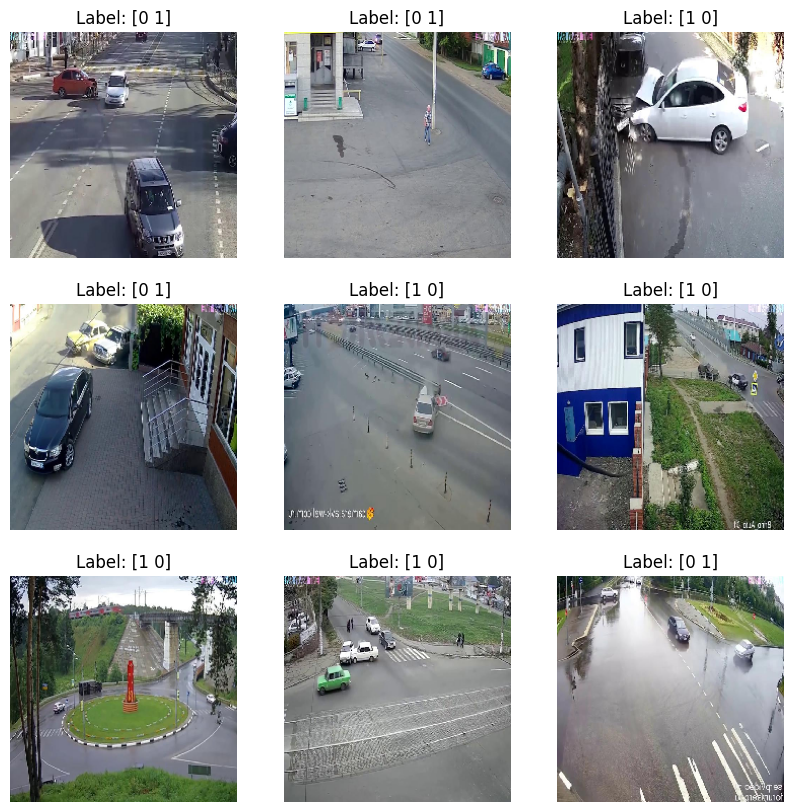

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images
images, labels = next(train_data)

# Plot some images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 output classes (Accident, No-Accident)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
train_df = pd.read_csv('/content/drive/MyDrive/Final Detection 2- 2.v3i.multiclass/train/_classes.csv')


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% for validation
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,  # Replace with your DataFrame name
    directory='/content/drive/MyDrive/Final Detection 2- 2.v3i.multiclass/train',  # Dataset folder
    x_col='filename',
    y_col=['Accident', 'No-Accident'],  # Class labels
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',  # For multi-label classification
    subset='training'  # Training data subset
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/drive/MyDrive/Final Detection 2- 2.v3i.multiclass/train',
    x_col='filename',
    y_col=['Accident', 'No-Accident'],
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    subset='validation'  # Validation data subset
)


Found 1042 validated image filenames.
Found 260 validated image filenames.


In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 472ms/step - accuracy: 0.5331 - loss: 1.5694 - val_accuracy: 0.5038 - val_loss: 0.6920
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - accuracy: 0.5334 - loss: 0.6943 - val_accuracy: 0.5538 - val_loss: 0.6870
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.5974 - loss: 0.6724 - val_accuracy: 0.6269 - val_loss: 0.6583
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.7051 - loss: 0.6271 - val_accuracy: 0.6885 - val_loss: 0.6215
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.7056 - loss: 0.5518 - val_accuracy: 0.7500 - val_loss: 0.5705
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 247ms/step - accuracy: 0.7478 - loss: 0.5121 - val_accuracy: 0.7769 - val_loss: 0.5334
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - accuracy: 0.7917 - loss: 0.4221 - val_accuracy: 0.7423 - val_loss: 0.5424
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.8247 - loss: 0.3589 - val_ac

In [ ]:
# Save the model in the new Keras format
model.save("accident_detection_model.keras", include_optimizer=False)

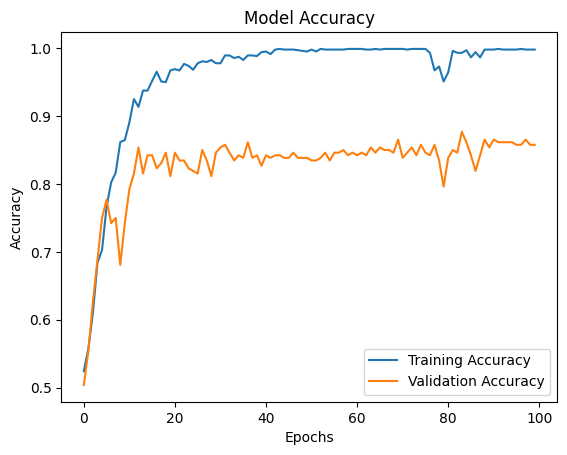

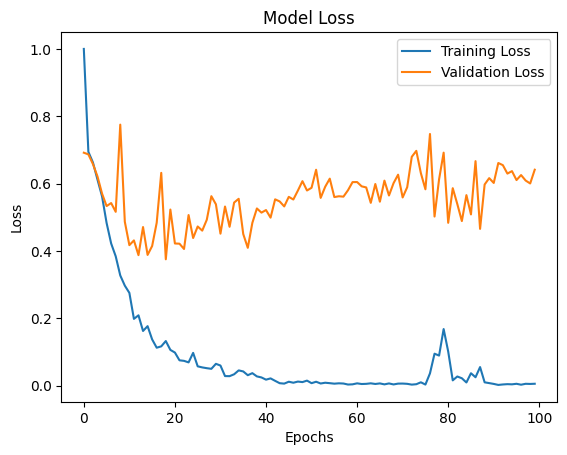

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("accident_detection_model.keras")

# Recompile (since we didn't save the optimizer)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
print(model.summary())  # This should display the model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
import numpy as np

# Dummy test image (Replace this with actual preprocessed image)
test_image = np.random.rand(1, 224, 224, 3)  # Adjust shape based on your model

# Get predictions
predictions = model.predict(test_image)
print("Predictions:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
Predictions: [[0.47968572 0.5203143 ]]


In [ ]:
predicted_class = np.argmax(predictions)  # Get class with highest probability
if predicted_class == 0:
    print("Predicted Class: Accident")
elif predicted_class == 1:
    print("Predicted Class: No-Accident")
else:
    print("Predicted Class: Unknown")


Predicted Class: No-Accident


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


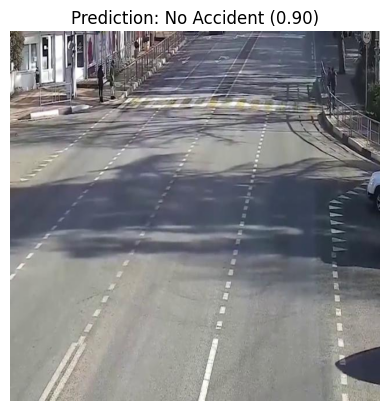

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = "/content/drive/MyDrive/Final Detection 2- 2.v3i.multiclass/test/test_11_jpg.rf.b5a1dc886902db5f5ecb02c37c016d9d.jpg"
image = cv2.imread(image_path)

# Check if image is loaded correctly
if image is None:
    raise ValueError("Error loading image. Check the file path!")

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize image to match model input shape
IMG_SIZE = (222, 222)  # Change this to match your model’s input size
image_resized = cv2.resize(image, IMG_SIZE)

# Normalize pixel values (if needed)
image_resized = image_resized / 255.0  # Only do this if your model was trained with normalization

# Expand dimensions to match model input shape
image_resized = np.expand_dims(image_resized, axis=0)  # Shape will be (1, 222, 222, 3)

# Make a prediction
predictions = model.predict(image_resized)
predicted_class = np.argmax(predictions)

# Define class labels
class_labels = ["Accident", "No Accident"]
predicted_label = class_labels[predicted_class]

# Display image with prediction
plt.imshow(image)
plt.axis("off")
plt.title(f"Prediction: {predicted_label} ({predictions[0][predicted_class]:.2f})", fontsize=12)
plt.show()



In [ ]:
# Save the model in the new Keras format
model.save("accident_detection_model.h5", include_optimizer=False)